# **Prediction Model_PFRHSC** 

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.regularizers import l2
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns

### Mounting our dataset

In [2]:
data = pd.read_csv('Test data.csv')
test_df = pd.DataFrame(data)
test_df.describe()

,Fiber,Temperature,Compressive Strength
count,20.000000,20.000000,20.000000
mean,0.750000,365.000000,39.791000
std,0.573539,269.307103,8.809767
min,0.000000,25.000000,22.570000
25%,0.375000,150.000000,35.587500
50%,0.750000,350.000000,40.145000
75%,1.125000,550.000000,45.207500
max,1.500000,750.000000,53.660000


In [3]:
test_df

,Fiber,Temperature,Compressive Strength
0,0.0,25,50.05
1,0.0,150,39.23
2,0.0,350,36.96
3,0.0,550,34.08
4,0.0,750,22.57
5,0.5,25,50.79
6,0.5,150,43.55
7,0.5,350,39.40
8,0.5,550,36.09
9,0.5,750,25.26


In [4]:
### Correlation between variables
corr = test_df.corr()

corr

,Fiber,Temperature,Compressive Strength
Fiber,1.000000e+00,-3.873875e-17,0.258640
Temperature,-3.873875e-17,1.000000e+00,-0.925949
Compressive Strength,2.586399e-01,-9.259492e-01,1.000000


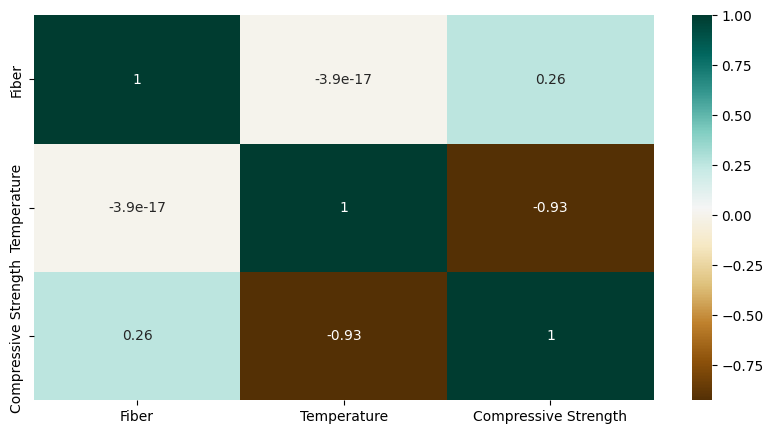

In [5]:
### Plotting the correlation 
plt.figure(figsize=(10,5))

sns.heatmap(corr, cmap='BrBG', annot=True)

plt.show()

In [6]:
### The DataFrame to a numpy array
data_array = test_df.to_numpy()

### The array to the desired shape
original_data = data_array.reshape(-1, 3)
original_data

array([[0.000e+00, 2.500e+01, 5.005e+01],
       [0.000e+00, 1.500e+02, 3.923e+01],
       [0.000e+00, 3.500e+02, 3.696e+01],
       [0.000e+00, 5.500e+02, 3.408e+01],
       [0.000e+00, 7.500e+02, 2.257e+01],
       [5.000e-01, 2.500e+01, 5.079e+01],
       [5.000e-01, 1.500e+02, 4.355e+01],
       [5.000e-01, 3.500e+02, 3.940e+01],
       [5.000e-01, 5.500e+02, 3.609e+01],
       [5.000e-01, 7.500e+02, 2.526e+01],
       [1.000e+00, 2.500e+01, 5.133e+01],
       [1.000e+00, 1.500e+02, 4.480e+01],
       [1.000e+00, 3.500e+02, 4.182e+01],
       [1.000e+00, 5.500e+02, 3.935e+01],
       [1.000e+00, 7.500e+02, 2.792e+01],
       [1.500e+00, 2.500e+01, 5.366e+01],
       [1.500e+00, 1.500e+02, 4.643e+01],
       [1.500e+00, 3.500e+02, 4.286e+01],
       [1.500e+00, 5.500e+02, 4.089e+01],
       [1.500e+00, 7.500e+02, 2.878e+01]])

In [7]:
### Generating augmented data
np.random.seed(42) 


num_synthetic_data = 150  

temperature_noise_std = 5.0  
fiber_content_noise_std = 0.1   

lower_limit_fiber_content = 0

np.random.seed(42)

augmented_data = []

for _ in range(num_synthetic_data):
    
    original_sample = original_data[np.random.randint(len(original_data))]

    fiber_content = original_sample[0] + np.random.normal(scale=fiber_content_noise_std)
    temperature = original_sample[1] + np.random.normal(scale=temperature_noise_std)
    compressive_strength = original_sample[2]
    
    fiber_content = max(fiber_content, lower_limit_fiber_content)

    new_data_point = [fiber_content,temperature, compressive_strength]

    augmented_data.append(new_data_point)
    
augmented_data

[[0.44497655108360507, 152.57716536225203, 43.55],
 [0.38881198819530793, 351.59451092344693, 39.4],
 [1.4905378998102028, 545.3558594998303, 40.89],
 [0.03925797504024593, 545.3540766653472, 34.08],
 [0.02330952390597439, 150.5899730617175, 39.23],
 [0, 147.6713512321487, 39.23],
 [1.0022221826611983, 147.86103543198328, 44.8],
 [0.4748956031914223, 749.1806644175261, 25.26],
 [1.5142464602386654, 549.826739078862, 40.89],
 [0.041701110966317526, 354.1623092856058, 36.96],
 [0.4399361310081195, 548.5415312510336, 36.09],
 [1.5779192634515005, 744.4945112182509, 28.78],
 [0.9466351196157513, 149.97236068839936, 44.8],
 [0.8806841770510907, 547.9547404913803, 39.35],
 [0.020886359500475543, 540.2016493806011, 34.08],
 [0.4538534281825817, 750.3332863925431, 25.26],
 [1.5218638316053863, 354.4088051947431, 42.86],
 [1.574585954182543, 15.817083803412238, 53.66],
 [0.5473193249460023, 353.2959529921449, 39.4],
 [0.9539361229040213, 755.2856111310946, 27.92],
 [1.0324083969394795, 348.0745

In [8]:
augmented_data_df = pd.DataFrame(augmented_data)
augmented_data_df[1].max()

757.7223741935389

In [63]:
### Descriptive stats for real/original data
test_df.describe()

,Fiber,Temperature,Compressive Strength
count,20.000000,20.000000,20.000000
mean,0.750000,365.000000,39.791000
std,0.573539,269.307103,8.809767
min,0.000000,25.000000,22.570000
25%,0.375000,150.000000,35.587500
50%,0.750000,350.000000,40.145000
75%,1.125000,550.000000,45.207500
max,1.500000,750.000000,53.660000


In [11]:
### Descriptive stats for augmented data
augmented_data_df.describe()

,0,1,2
count,150.000000,150.000000,150.000000
mean,0.718657,389.915157,38.835600
std,0.601487,263.581892,8.812902
min,0.000000,15.239561,22.570000
25%,0.082029,149.427824,34.080000
50%,0.563143,353.086127,39.375000
75%,1.385948,554.073249,43.550000
max,1.731466,757.722374,53.660000


### Splitting the dataset

In [12]:
augmented_data = np.array(augmented_data)
X_aug = augmented_data[:, :-1]
y_aug = augmented_data[:, -1] 

In [13]:
real_data = np.array(test_df)
X_real = real_data[:, :-1]
y_real = real_data[:, -1] 

In [14]:
X_real

array([[0.0e+00, 2.5e+01],
       [0.0e+00, 1.5e+02],
       [0.0e+00, 3.5e+02],
       [0.0e+00, 5.5e+02],
       [0.0e+00, 7.5e+02],
       [5.0e-01, 2.5e+01],
       [5.0e-01, 1.5e+02],
       [5.0e-01, 3.5e+02],
       [5.0e-01, 5.5e+02],
       [5.0e-01, 7.5e+02],
       [1.0e+00, 2.5e+01],
       [1.0e+00, 1.5e+02],
       [1.0e+00, 3.5e+02],
       [1.0e+00, 5.5e+02],
       [1.0e+00, 7.5e+02],
       [1.5e+00, 2.5e+01],
       [1.5e+00, 1.5e+02],
       [1.5e+00, 3.5e+02],
       [1.5e+00, 5.5e+02],
       [1.5e+00, 7.5e+02]])

In [15]:
scaler = StandardScaler()
X_real_scaled = scaler.fit_transform(X_real)
X_real_scaled

array([[-1.34164079, -1.29529684],
       [-1.34164079, -0.81908477],
       [-1.34164079, -0.05714545],
       [-1.34164079,  0.70479387],
       [-1.34164079,  1.46673319],
       [-0.4472136 , -1.29529684],
       [-0.4472136 , -0.81908477],
       [-0.4472136 , -0.05714545],
       [-0.4472136 ,  0.70479387],
       [-0.4472136 ,  1.46673319],
       [ 0.4472136 , -1.29529684],
       [ 0.4472136 , -0.81908477],
       [ 0.4472136 , -0.05714545],
       [ 0.4472136 ,  0.70479387],
       [ 0.4472136 ,  1.46673319],
       [ 1.34164079, -1.29529684],
       [ 1.34164079, -0.81908477],
       [ 1.34164079, -0.05714545],
       [ 1.34164079,  0.70479387],
       [ 1.34164079,  1.46673319]])

### Preparing the data for cross-validation

In [16]:
X_real_scaled_test, X_real_scaled_cv, y_real_test, y_real_cv = train_test_split(X_real_scaled, 
                                                                                y_real, test_size = 0.5, 
                                                                                random_state = 42)

In [17]:
print(X_real_scaled_test.shape)
print(X_real_scaled_cv.shape)

print(y_real_test.shape)
print(y_real_cv.shape)

(10, 2)
(10, 2)
(10,)
(10,)


In [18]:
X_aug_scaled = scaler.transform(X_aug)
X_aug_scaled.shape

(150, 2)

In [19]:
### Random Seeding
def set_random_seeds(seed_value=42):

    np.random.seed(seed_value)

    tf.random.set_seed(seed_value)

### Building different architecture for our model

In [20]:
def ANN_model(reg):
    
    model_1 = Sequential(
        [
            Dense(2, activation='relu', kernel_regularizer=l2(reg)),
            Dense(4, activation='relu', kernel_regularizer=l2(reg)),
            Dense(1, activation='linear')
        ],
        name='model_1'
    )

    model_2 = Sequential(
        [
            Dense(4, activation='relu', kernel_regularizer=l2(reg)),
            Dense(4, activation='relu', kernel_regularizer=l2(reg)),
            Dense(2, activation='relu', kernel_regularizer=l2(reg)),
            Dense(1, activation='linear'),
        ],
        name='model_2'
    )

    model_3 = Sequential(
        [
            Dense(4, activation='relu', kernel_regularizer=l2(reg)),
            Dense(3, activation='relu', kernel_regularizer=l2(reg)),
            Dense(1, activation='linear'),
        ],
        name='model_3'
    )
    
    model_4 = Sequential(
        [
            Dense(5, activation='relu', kernel_regularizer=l2(reg)),
            Dense(3, activation='relu', kernel_regularizer=l2(reg)),
            Dense(1, activation='linear'),
        ],
        name='model_4'
    )
    
    model_5 = Sequential(
        [
            Dense(3, activation='relu', kernel_regularizer=l2(reg)),
            Dense(5, activation='relu', kernel_regularizer=l2(reg)),
            Dense(2, activation='relu', kernel_regularizer=l2(reg)),
            Dense(1, activation='linear')
        ],
        name='model_5'
    )
    
    model_6 = Sequential(
        [
            Dense(4, activation='relu', kernel_regularizer=l2(reg)),
            Dense(5, activation='relu', kernel_regularizer=l2(reg)),
            Dense(2, activation='relu', kernel_regularizer=l2(reg)),
            Dense(1, activation='linear')
        ],
        name='model_6'
    )   
    
    model_list = [model_1, model_2, model_3, model_4, model_5, model_6]
    
    return model_list
    

In [21]:
def train_and_evaluate_model(model, X_train, y_train, X_cv, y_cv, model_name):
    set_random_seeds()
    model.compile(
        loss='mean_squared_error',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    )

    print(f"Model's name: {model.name}..." + 
         f"With Regularization: {reg}")

    # Adding EarlyStopping callback
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=500,
        validation_data=(X_cv, y_cv),
        callbacks=[early_stopping],
        verbose=0
    )
    
    model.save(f"{model_name}.keras")
    
    yhat_train = model.predict(X_train)
    train_mse = mean_squared_error(y_train, yhat_train) / 2
    print(f"Training data MSE: {train_mse}")

    yhat_cv = model.predict(X_cv)
    cv_mse = mean_squared_error(y_cv, yhat_cv) / 2
    print(f"CV data MSE: {cv_mse}")

    r2 = r2_score(y_cv, yhat_cv)
    print(f"R2 value: {r2}\n\n")

    # Plotting the training history
    plot_training_history(history, model_name)


def plot_training_history(history, model_name):
    import matplotlib.pyplot as plt

    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f"{model_name}_training_plot.png")
    plt.show()

regularization_strengths = [0, 0.01, 0.001, 0.0001]
saved_models = {}



Model's name: model_1...With Regularization: 0
5/5 [==============================] - 0s 0s/step
Training data MSE: 2.580518563162548
1/1 [==============================] - 0s 11ms/step
CV data MSE: 3.285533911716146
R2 value: 0.825766172199677




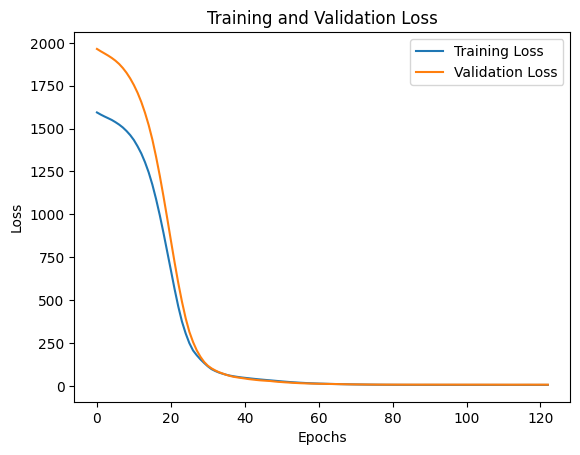

Model's name: model_2...With Regularization: 0
5/5 [==============================] - 0s 1ms/step
Training data MSE: 8.859815659903024
1/1 [==============================] - 0s 15ms/step
CV data MSE: 6.62578032689281
R2 value: 0.6486309076275494




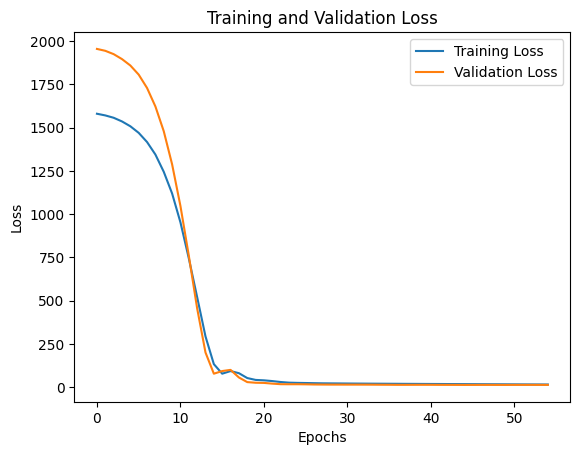

Model's name: model_3...With Regularization: 0
5/5 [==============================] - 0s 0s/step
Training data MSE: 1.609426369361695
1/1 [==============================] - 0s 13ms/step
CV data MSE: 2.5387445827272925
R2 value: 0.8653688568306808




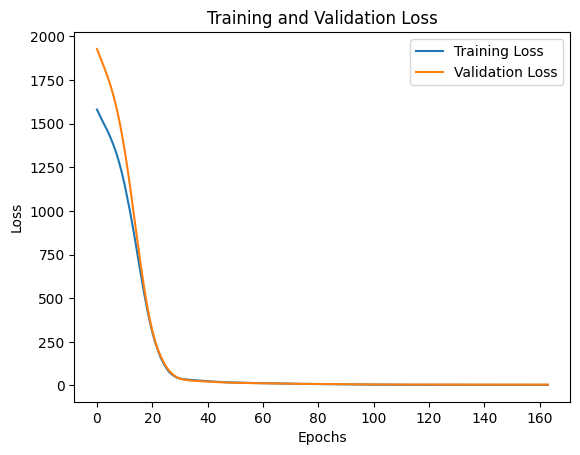

Model's name: model_4...With Regularization: 0
5/5 [==============================] - 0s 669us/step
Training data MSE: 0.3522242109317968
1/1 [==============================] - 0s 13ms/step
CV data MSE: 0.30024690905882995
R2 value: 0.9840777268912101




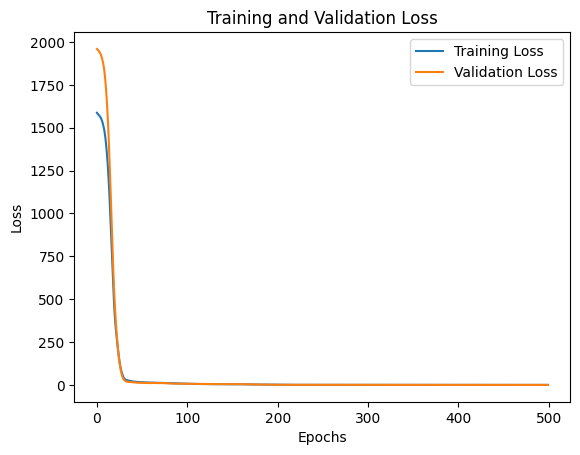

Model's name: model_5...With Regularization: 0
5/5 [==============================] - 0s 2ms/step
Training data MSE: 3.060300498405309
1/1 [==============================] - 0s 12ms/step
CV data MSE: 3.6485618266365534
R2 value: 0.8065145848124953




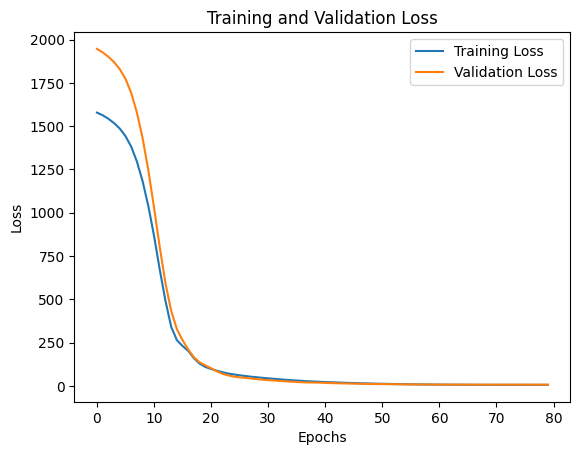

Model's name: model_6...With Regularization: 0
5/5 [==============================] - 0s 0s/step
Training data MSE: 189.5557718005569
1/1 [==============================] - 0s 15ms/step
CV data MSE: 270.3972912192886
R2 value: -13.339330027297429




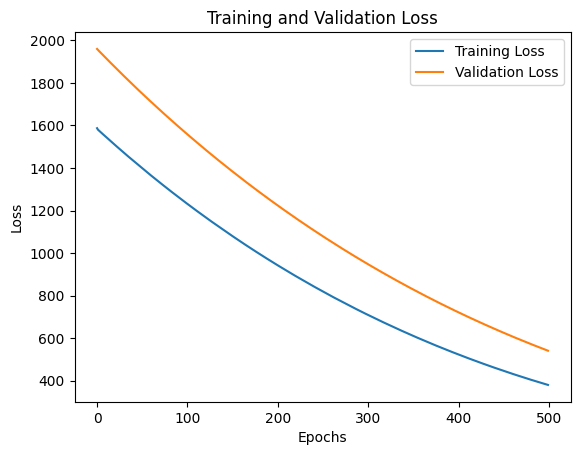

Model's name: model_1...With Regularization: 0.01
5/5 [==============================] - 0s 2ms/step
Training data MSE: 2.9412032798706513
1/1 [==============================] - 0s 14ms/step
CV data MSE: 3.910859081472129
R2 value: 0.7926048045577396




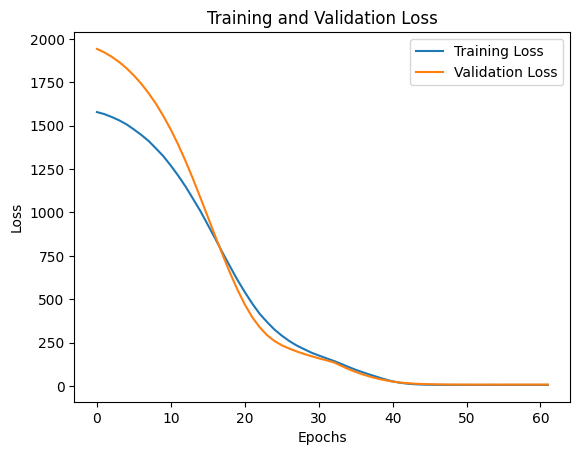

Model's name: model_2...With Regularization: 0.01
5/5 [==============================] - 0s 0s/step
Training data MSE: 2.8525954515172756
1/1 [==============================] - 0s 14ms/step
CV data MSE: 3.303069009122705
R2 value: 0.824836275499752




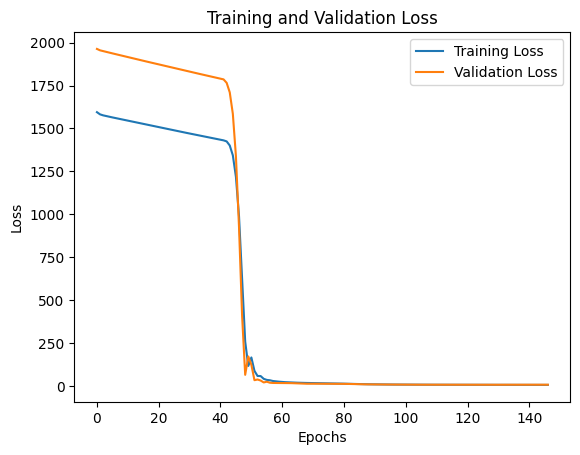

Model's name: model_3...With Regularization: 0.01
5/5 [==============================] - 0s 1ms/step
Training data MSE: 2.9683736220007018
1/1 [==============================] - 0s 15ms/step
CV data MSE: 4.04192613311028
R2 value: 0.7856542404427311




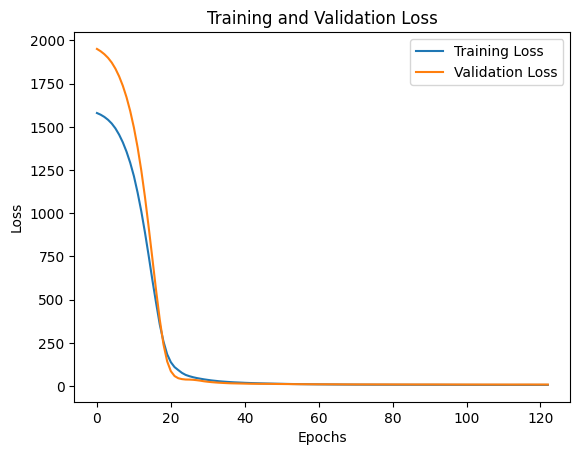

Model's name: model_4...With Regularization: 0.01
5/5 [==============================] - 0s 2ms/step
Training data MSE: 189.67511415060164
1/1 [==============================] - 0s 14ms/step
CV data MSE: 270.55132564697004
R2 value: -13.347498565096497




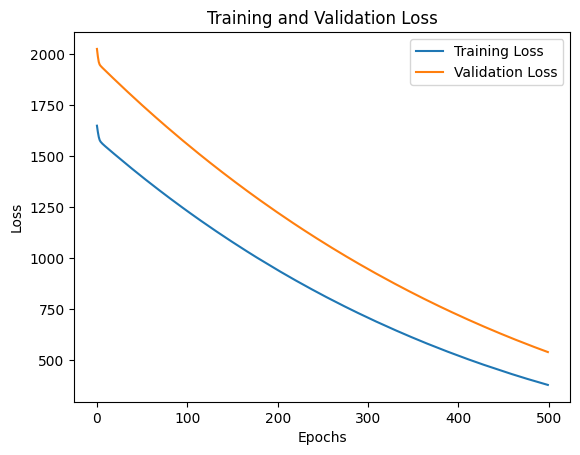

Model's name: model_5...With Regularization: 0.01
5/5 [==============================] - 0s 1ms/step
Training data MSE: 189.65512101970788
1/1 [==============================] - 0s 20ms/step
CV data MSE: 270.5255215930721
R2 value: -13.346130160689722




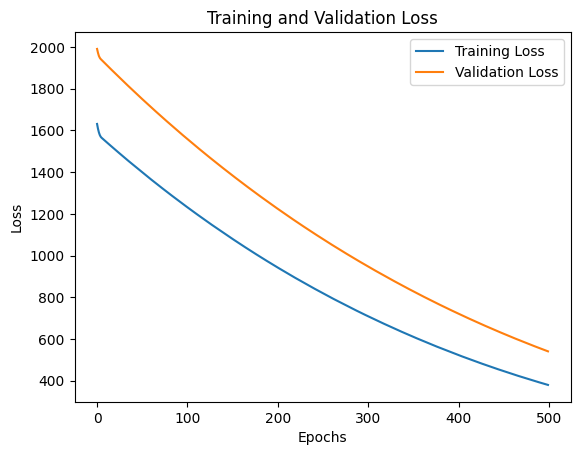

Model's name: model_6...With Regularization: 0.01
5/5 [==============================] - 0s 0s/step
Training data MSE: 2.7766060268354855
1/1 [==============================] - 0s 13ms/step
CV data MSE: 3.6571039773543648
R2 value: 0.8060615894524704




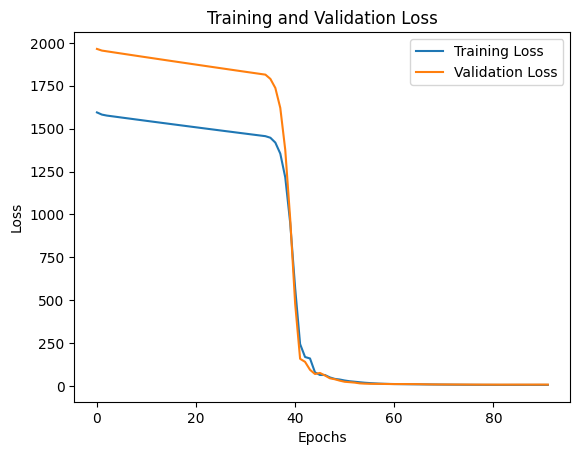

Model's name: model_1...With Regularization: 0.001
5/5 [==============================] - 0s 0s/step
Training data MSE: 2.9732114020656697
1/1 [==============================] - 0s 14ms/step
CV data MSE: 3.7186719033134983
R2 value: 0.8027966055266209




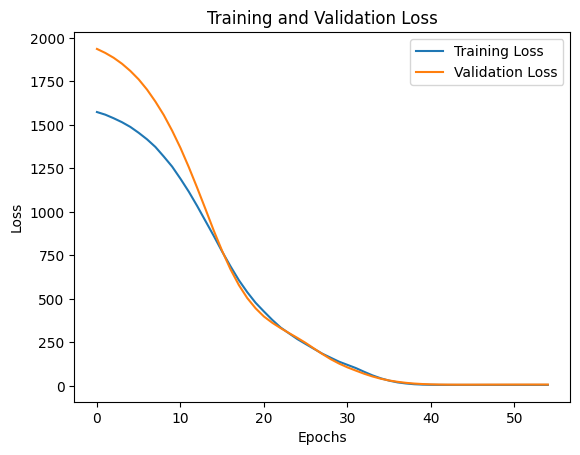

Model's name: model_2...With Regularization: 0.001
5/5 [==============================] - 0s 0s/step
Training data MSE: 4.457120889152112
1/1 [==============================] - 0s 14ms/step
CV data MSE: 3.973299045049881
R2 value: 0.7892935759555726




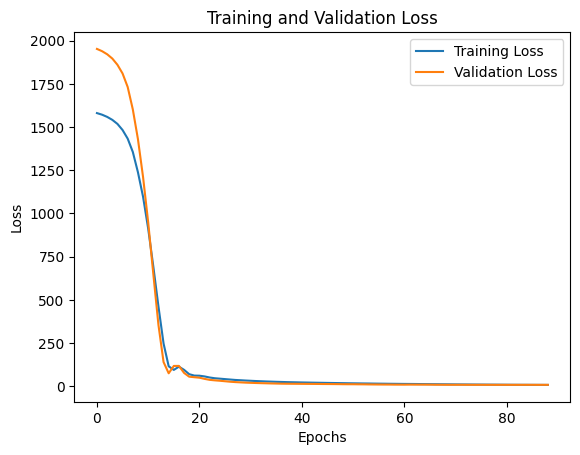

Model's name: model_3...With Regularization: 0.001
5/5 [==============================] - 0s 0s/step
Training data MSE: 19.894071874394132
1/1 [==============================] - 0s 13ms/step
CV data MSE: 7.83725506724393
R2 value: 0.5843856777907573




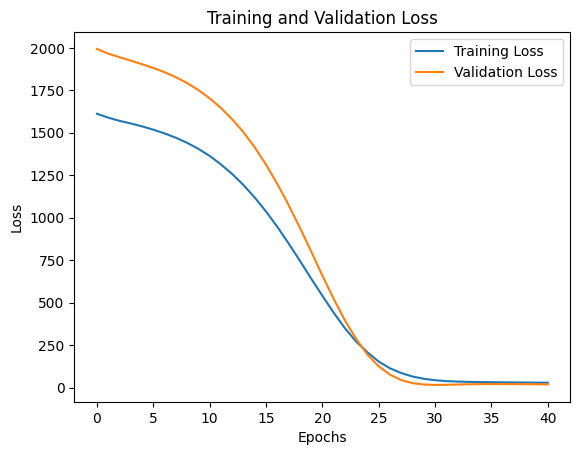

Model's name: model_4...With Regularization: 0.001
5/5 [==============================] - 0s 0s/step
Training data MSE: 3.001332873747827
1/1 [==============================] - 0s 20ms/step
CV data MSE: 3.9431625008047093
R2 value: 0.7908917349159126




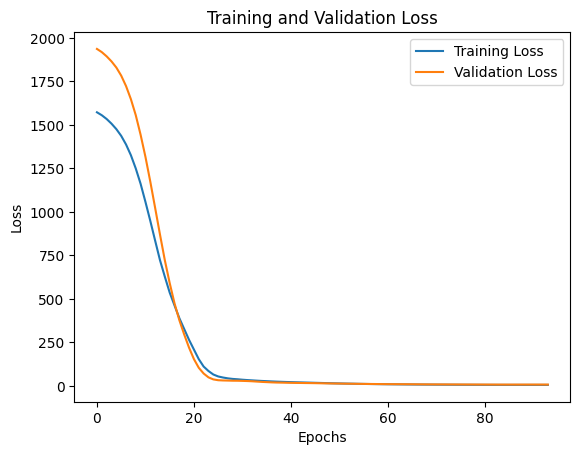

Model's name: model_5...With Regularization: 0.001
5/5 [==============================] - 0s 2ms/step
Training data MSE: 0.2714707351576779
1/1 [==============================] - 0s 15ms/step
CV data MSE: 0.323652526358203
R2 value: 0.9828365130113116




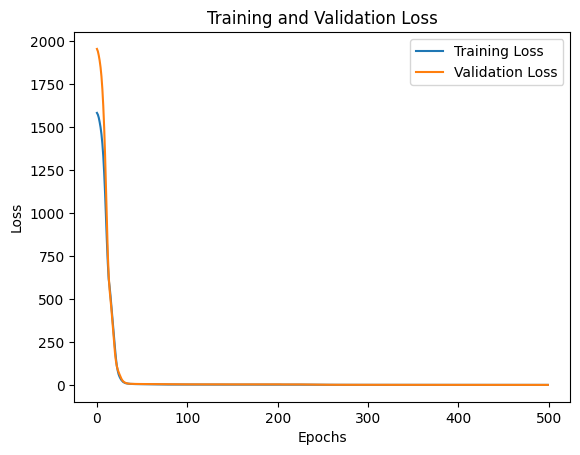

Model's name: model_6...With Regularization: 0.001
5/5 [==============================] - 0s 250us/step
Training data MSE: 7.788228491141356
1/1 [==============================] - 0s 14ms/step
CV data MSE: 5.1742759738447335
R2 value: 0.7256050513423828




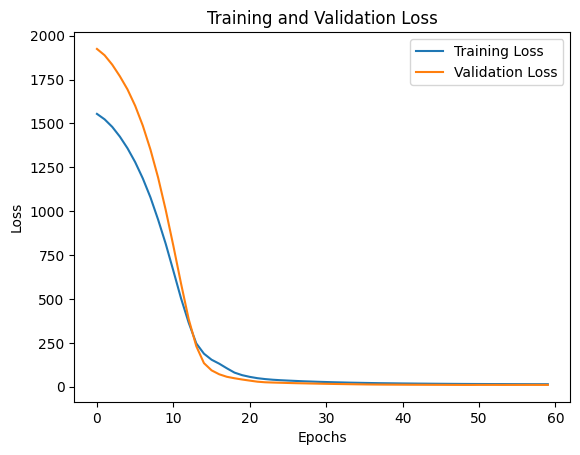

Model's name: model_1...With Regularization: 0.0001
5/5 [==============================] - 0s 2ms/step
Training data MSE: 0.8740650865791937
1/1 [==============================] - 0s 16ms/step
CV data MSE: 1.4778607526016447
R2 value: 0.9216281606580182




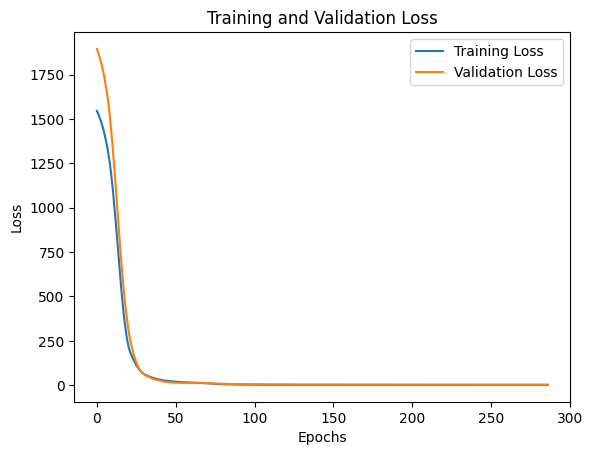

Model's name: model_2...With Regularization: 0.0001
5/5 [==============================] - 0s 2ms/step
Training data MSE: 8.859778280038727
1/1 [==============================] - 0s 14ms/step
CV data MSE: 5.7189966399552725
R2 value: 0.6967181887232091




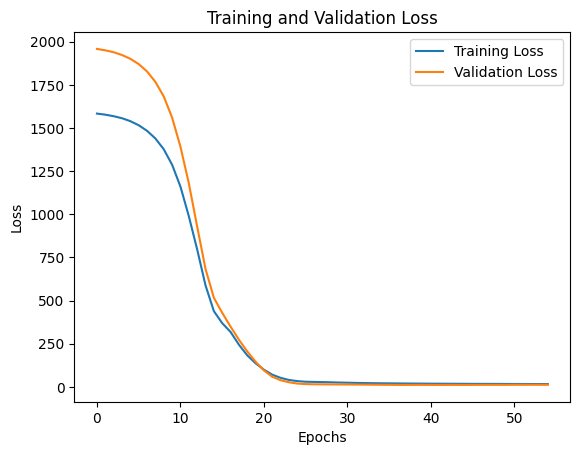

Model's name: model_3...With Regularization: 0.0001
5/5 [==============================] - 0s 0s/step
Training data MSE: 2.757641952356171
1/1 [==============================] - 0s 13ms/step
CV data MSE: 3.5318847184910673
R2 value: 0.8127020416201596




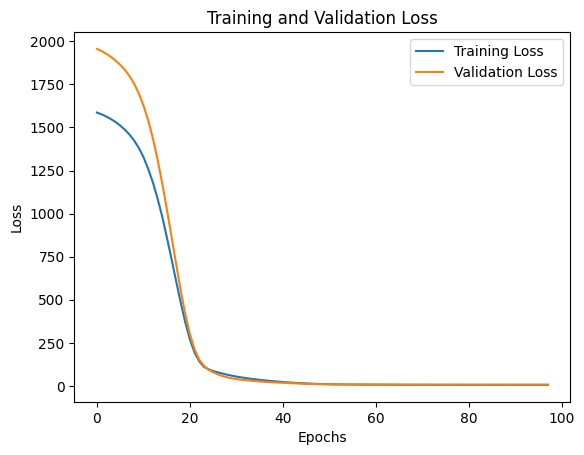

Model's name: model_4...With Regularization: 0.0001
5/5 [==============================] - 0s 0s/step
Training data MSE: 12.41795390022797
1/1 [==============================] - 0s 14ms/step
CV data MSE: 7.292827085069447
R2 value: 0.6132570192058027




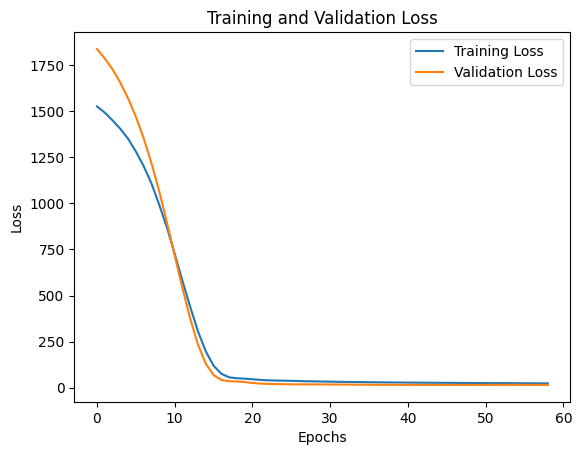

Model's name: model_5...With Regularization: 0.0001
5/5 [==============================] - 0s 2ms/step
Training data MSE: 189.62150371243035
1/1 [==============================] - 0s 14ms/step
CV data MSE: 270.4821326839269
R2 value: -13.343829220894978




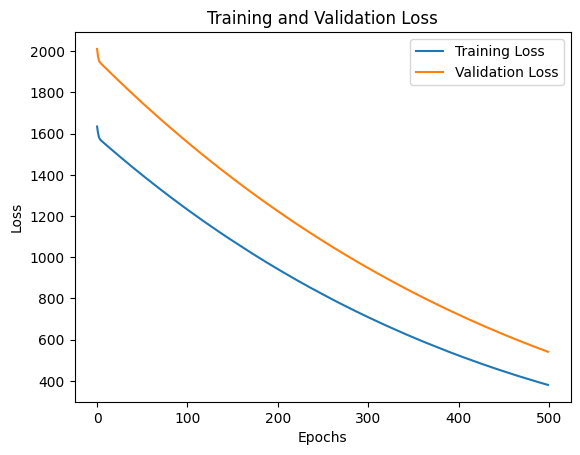

Model's name: model_6...With Regularization: 0.0001
5/5 [==============================] - 0s 0s/step
Training data MSE: 7.798547934803226
1/1 [==============================] - 0s 14ms/step
CV data MSE: 4.838379835979124
R2 value: 0.7434178243699182




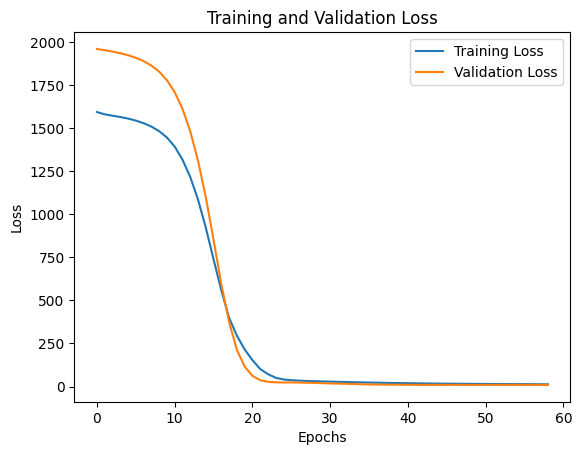

In [22]:
for reg in regularization_strengths:
    models_with_reg = ANN_model(reg)
    for i, model in enumerate(models_with_reg):
        model_name = f"model_{i + 1}_reg_{reg}"
        train_and_evaluate_model(model, X_aug_scaled, y_aug, X_real_scaled_cv, y_real_cv, model_name)
        
        saved_models[model_name] = load_model(f"{model_name}.keras")

In [23]:
saved_models

{'model_1_reg_0': <keras.src.engine.sequential.Sequential at 0x1ec5ae4df50>,
 'model_2_reg_0': <keras.src.engine.sequential.Sequential at 0x1ec5bfe6590>,
 'model_3_reg_0': <keras.src.engine.sequential.Sequential at 0x1ec5ca59690>,
 'model_4_reg_0': <keras.src.engine.sequential.Sequential at 0x1ec5dbf9f50>,
 'model_5_reg_0': <keras.src.engine.sequential.Sequential at 0x1ec5e306a50>,
 'model_6_reg_0': <keras.src.engine.sequential.Sequential at 0x1ec5891df50>,
 'model_1_reg_0.01': <keras.src.engine.sequential.Sequential at 0x1ec60664050>,
 'model_2_reg_0.01': <keras.src.engine.sequential.Sequential at 0x1ec605bdf50>,
 'model_3_reg_0.01': <keras.src.engine.sequential.Sequential at 0x1ec61ac0450>,
 'model_4_reg_0.01': <keras.src.engine.sequential.Sequential at 0x1ec61e88d90>,
 'model_5_reg_0.01': <keras.src.engine.sequential.Sequential at 0x1ec62075f50>,
 'model_6_reg_0.01': <keras.src.engine.sequential.Sequential at 0x1ec633ade90>,
 'model_1_reg_0.001': <keras.src.engine.sequential.Sequent

### Based on the trial results, "model_3_reg_0" is selected

In [55]:
### Evaluating for testing set
selected_model = saved_models['model_3_reg_0']

print(f"Selected Model: {selected_model.name}")
yhat_real = selected_model.predict(X_real_scaled_test)
ori_mse = mean_squared_error(y_real_test, yhat_real) / 2
print(f"Mean Squared Error (MSE) for original data:{ori_mse}")
ori_mae = mean_absolute_error(y_real_test, yhat_real)
print(f"Mean Absolute Error (MAE) for original data:{ori_mae}")
ori_r2 = r2_score(y_real_test, yhat_real)
print(f"R2 for original data:{ori_r2}")
ori_rmse = np.sqrt(ori_mse)
print(f"Root Mean Squared Error (RMSE) for original data:{ori_rmse}")

Selected Model: model_3
1/1 [==============================] - 0s 17ms/step
Mean Squared Error (MSE) for original data:0.5834640551899049
Mean Absolute Error (MAE) for original data:0.8935073165893559
R2 for original data:0.9846815368305608
Root Mean Squared Error (RMSE) for original data:0.7638481885753902


In [51]:
print(f"Original: \n {y_real_test}" + 
      f"\nPrediction: \n{yhat_real}")

Original: 
 [39.35 36.96 25.26 28.78 22.57 41.82 39.4  51.33 27.92 43.55]
Prediction: 
[[37.599445]
 [38.16062 ]
 [24.875378]
 [29.029325]
 [22.880789]
 [42.050266]
 [40.105442]
 [49.28284 ]
 [26.869967]
 [44.55626 ]]


In [54]:
### Original vs prediction for testing set
original_series = pd.Series(y_real_test.flatten(), name="Original")
prediction_series = pd.Series(yhat_real.flatten(), name="Prediction")

df_ANN = pd.concat([original_series, prediction_series], axis=1)

df_ANN

,Original,Prediction
0,39.35,37.599445
1,36.96,38.160622
2,25.26,24.875378
3,28.78,29.029325
4,22.57,22.880789
5,41.82,42.050266
6,39.40,40.105442
7,51.33,49.282841
8,27.92,26.869967
9,43.55,44.556259


### Final outputs

In [56]:
### Evaluation for total dataset
selected_model = saved_models['model_3_reg_0']

print(f"Selected Model: {selected_model.name}")
yhat_real_full = selected_model.predict(X_real_scaled)
ori_mse = mean_squared_error(y_real, yhat_real_full) / 2
print(f"Mean Squared Error (MSE) for original data:{ori_mse}")
ori_mae = mean_absolute_error(y_real, yhat_real_full)
print(f"Mean Absolute Error (MAE) for original data:{ori_mae}")
ori_r2 = r2_score(y_real, yhat_real_full)
print(f"R2 for original data:{ori_r2}")
ori_rmse = np.sqrt(ori_mse)
print(f"Root Mean Squared Error (RMSE) for original data:{ori_rmse}")

Selected Model: model_3
1/1 [==============================] - 0s 14ms/step
Mean Squared Error (MSE) for original data:1.561104318958599
Mean Absolute Error (MAE) for original data:1.359362674713135
R2 for original data:0.9576542815717577
Root Mean Squared Error (RMSE) for original data:1.2494416028604933


In [48]:
original_series_full = pd.Series(y_real.flatten(), name="Original")
prediction_series_full = pd.Series(yhat_real_full.flatten(), name="Prediction")

df_ANN_complete = pd.concat([original_series_full, prediction_series_full], axis=1)

df_ANN_complete

,Original,Prediction
0,50.05,46.978348
1,39.23,43.577091
2,36.96,38.160622
3,34.08,33.709808
4,22.57,22.880789
5,50.79,47.338020
6,43.55,44.556259
7,39.40,40.105442
8,36.09,35.654629
9,25.26,24.875378


In [60]:
### Saving the outputs
df_ANN_complete.to_csv('ANN_original_VS_predictions.csv', index=False)

In [61]:
model_weights = selected_model.get_weights()

for i, layer_weights in enumerate(model_weights):
    print(f"Layer {i + 1} Weights:")
    print(layer_weights)

Layer 1 Weights:
[[-0.1293002   1.4309075  -0.7351352  -0.04922803]
 [-1.1272044   0.27700788  0.8971527  -1.250599  ]]
Layer 2 Weights:
[1.7988118 1.9410326 1.7409108 1.9271224]
Layer 3 Weights:
[[-0.78417563  1.7162769  -0.6814531 ]
 [ 0.40291125  1.8015128  -0.5435735 ]
 [ 1.1114101   1.9340241  -0.43500724]
 [-2.2003753   2.0313416   0.39890087]]
Layer 4 Weights:
[-0.53621143  1.341851    0.        ]
Layer 5 Weights:
[[-1.8069254]
 [ 2.6068041]
 [-1.1417918]]
Layer 6 Weights:
[1.1010375]


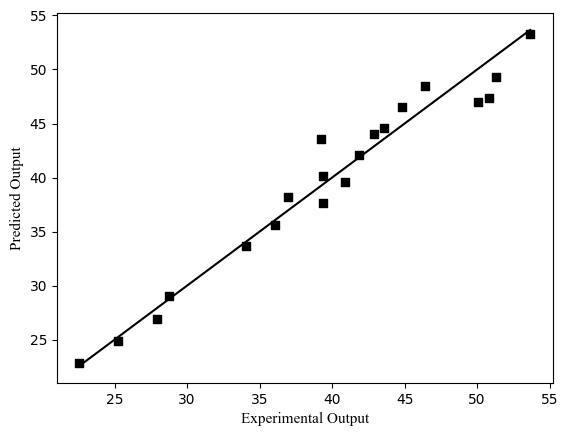

In [62]:
### Plotting the Predicted and Experimental outputs
plt.scatter(y_real, yhat_real_full, color='black', marker='s')

plt.xlabel('Experimental Output', fontsize=11, fontname='Times New Roman')
plt.ylabel('Predicted Output', fontsize=11, fontname='Times New Roman')

min_val = min(min(y_real), min(yhat_real_full))
max_val = max(max(y_real), max(yhat_real_full))
plt.plot([min_val, max_val], [min_val, max_val], color='black', linestyle='-')

plt.show()